<a href="https://colab.research.google.com/github/MauGutierrez/03MAIR---Algoritmos-de-Optimizacion---2021/blob/main/AG2/Algoritmos_Gerardo_Guti%C3%A9rrez_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad Guiada 2 de Algoritmos de Optimización**

- **Nombre y apellidos:** Gerardo Mauricio Gutierrez Quintana
- **URL Colab:** https://colab.research.google.com/drive/1xztTXliQwa9fBWhBfS6YXPtwsR8m_geY?usp=sharing

# Viaje por el rio

In [8]:
TARIFAS = [
           [0,5,4,3,9999,9999,9999],
           [9999,0,9999,2,3,9999,11], 
           [9999,9999, 0,1,9999,4,10],
           [9999,9999,9999, 0,5,6,9],
           [9999,9999, 9999,9999,0,9999,4],
           [9999,9999, 9999,9999,9999,0,3],
           [9999,9999,9999,9999,9999,9999,0]
          ]

def Precios(TARIFAS):
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]
  
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA


PRECIOS,RUTA = Precios(TARIFAS)  

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i])

def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6)

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 9999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 9999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']

La ruta es:


'0,0,2,5'

# Problema de Asignacion de tarea

In [9]:
import itertools

COSTES = [[11, 12, 18, 40],
          [14, 15, 13, 22],
          [11, 17, 19, 23],
          [17, 14, 20, 28]]

def valor(S, COSTES):
  valor = 0
  for i in range(len(S)):
    valor += COSTES[i][S[i]]
  
  return valor

def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  
  print(f'La mejor solucion es :{mejor_solucion}, con valor: {mejor_valor}')

fuerza_bruta(COSTES)

La mejor solucion es :(0, 2, 3, 1), con valor: 61


In [10]:
'''
     1   2   3   4
  A0 [11, 12, 18, 40]
  A1 [14, 15, 13, 22]
  A2 [11, 17, 19, 23]
  A3 [17, 14, 20, 28]
  
  A0 -> job1 = 11
  A1 -> job2 = 15
  A2 -> job3 = 19
  A3 -> job4 = 28
'''

COSTES = [[11, 12, 18, 40],
          [14, 15, 13, 22],
          [11, 17, 19, 23],
          [17, 14, 20, 28]]

#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR



valor((0, 1, 2, 3  ),COSTES)

73

In [11]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
    # print(VALOR)
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CS((0,1),COSTES)

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  # print(MEJOR_SOLUCION)
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )
  # print(CotaSup)
  # print(NODOS)
  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1
    # print("NODOS")
    # print(NODOS)
    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    # print("NODO PROMETEDOR")
    # print(nodo_prometedor)
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]
    # print("HIJOS")
    # print(HIJOS)
    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    # print(NODO_FINAL)
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


# Análisis para mejorar nota

### ¿Qué complejidad tiene el algoritmo por fuerza bruta?

Dado que iteramos por todas las permutaciones posibles de la matriz de costos, este algoritmo tiene una complejidad de $O(n!)$ donde $n$ es el tamaño de la matriz de costos.

### Generar matrices con valores aleatorios de mayores dimensiones y ejecutar ambos algoritmos.


In [13]:
import numpy as np
import time

def generar_tomas_aleatorias(n):
  """
  Funcion para generar una matriz de datos aleatorios
  """

  datos_random = []

  for i in range(n):
    jobs = []
    for i in range(n):
      jobs.append(np.random.randint(10, 50))

    np.random.shuffle(jobs)
    datos_random.append(jobs)

  return datos_random

costos_1 = generar_tomas_aleatorias(5)
costos_2 = generar_tomas_aleatorias(6)
costos_3 = generar_tomas_aleatorias(7)
costos_4 = generar_tomas_aleatorias(8)
costos_5 = generar_tomas_aleatorias(10)

##### Matriz de tamaño 5
print(f'Matriz de tamaño 5')
start_fuerza_bruta = time.time()
fuerza_bruta(costos_1)
stop_fuerza_bruta = time.time()
print(f'Tiempo de ejecución de algoritmo por fuerza bruta: {stop_fuerza_bruta - start_fuerza_bruta}')

start_branch_and_bound = time.time()
ramificacion_y_poda(costos_1)
stop_branch_and_bound = time.time()
print(f'Tiempo de ejecución de algoritmo branch and bound: {stop_branch_and_bound - start_branch_and_bound} \n')


##### Matriz de tamaño 6
print(f'Matriz de tamaño 6')
start_fuerza_bruta = time.time()
fuerza_bruta(costos_2)
stop_fuerza_bruta = time.time()
print(f'Tiempo de ejecución de algoritmo por fuerza bruta: {stop_fuerza_bruta - start_fuerza_bruta}')

start_branch_and_bound = time.time()
ramificacion_y_poda(costos_2)
stop_branch_and_bound = time.time()
print(f'Tiempo de ejecución de algoritmo branch and bound: {stop_branch_and_bound - start_branch_and_bound} \n')

##### Matriz de tamaño 7
print(f'Matriz de tamaño 7')
start_fuerza_bruta = time.time()
fuerza_bruta(costos_3)
stop_fuerza_bruta = time.time()
print(f'Tiempo de ejecución de algoritmo por fuerza bruta: {stop_fuerza_bruta - start_fuerza_bruta}')

start_branch_and_bound = time.time()
ramificacion_y_poda(costos_3)
stop_branch_and_bound = time.time()
print(f'Tiempo de ejecución de algoritmo branch and bound: {stop_branch_and_bound - start_branch_and_bound} \n')

##### Matriz de tamaño 8
print(f'Matriz de tamaño 8')
start_fuerza_bruta = time.time()
fuerza_bruta(costos_4)
stop_fuerza_bruta = time.time()
print(f'Tiempo de ejecución de algoritmo por fuerza bruta: {stop_fuerza_bruta - start_fuerza_bruta}')

start_branch_and_bound = time.time()
ramificacion_y_poda(costos_4)
stop_branch_and_bound = time.time()
print(f'Tiempo de ejecución de algoritmo branch and bound: {stop_branch_and_bound - start_branch_and_bound} \n')

##### Matriz de tamaño 9
print(f'Matriz de tamaño 10')
start_fuerza_bruta = time.time()
fuerza_bruta(costos_5)
stop_fuerza_bruta = time.time()
print(f'Tiempo de ejecución de algoritmo por fuerza bruta: {stop_fuerza_bruta - start_fuerza_bruta}')

start_branch_and_bound = time.time()
ramificacion_y_poda(costos_5)
stop_branch_and_bound = time.time()
print(f'Tiempo de ejecución de algoritmo branch and bound: {stop_branch_and_bound - start_branch_and_bound} \n')

Matriz de tamaño 5
La mejor solucion es :(2, 4, 3, 1, 0), con valor: 69
Tiempo de ejecución de algoritmo por fuerza bruta: 0.00040984153747558594
La solucion final es: [{'s': (4, 3, 0, 2, 1), 'ci': 69}]  en  52  iteraciones  para dimension:  5
Tiempo de ejecución de algoritmo branch and bound: 0.0022306442260742188 

Matriz de tamaño 6
La mejor solucion es :(2, 4, 5, 3, 1, 0), con valor: 138
Tiempo de ejecución de algoritmo por fuerza bruta: 0.0011227130889892578
La solucion final es: [{'s': (5, 4, 0, 3, 1, 2), 'ci': 138}]  en  209  iteraciones  para dimension:  6
Tiempo de ejecución de algoritmo branch and bound: 0.00747227668762207 

Matriz de tamaño 7
La mejor solucion es :(4, 3, 6, 0, 5, 1, 2), con valor: 100
Tiempo de ejecución de algoritmo por fuerza bruta: 0.006536722183227539
La solucion final es: [{'s': (5, 4, 6, 1, 0, 3, 2), 'ci': 100}]  en  122  iteraciones  para dimension:  7
Tiempo de ejecución de algoritmo branch and bound: 0.0047872066497802734 

Matriz de tamaño 8
La me

### ¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?

En nuestro experimento con una matriz de datos aleatorios, el algoritmo por fuerza bruta deja de ser una solución viable a partir de una dimensión de 10x10. 

Podemos ver que para dimensiones no muy grandes el algoritmo por fuerza bruta presenta un rendimiento similar e incluso en ocasiones mejor al algoritmo de branch and bound, sin embargo, a partir de una dimension de 10, el algoritmo por fuerza bruta tarda aproximadamente 5 segundos en terminar.

Ya que iteramos como tantas permutaciones haya, es entendible que el algoritmo por fuerza bruta tenga un rendimiento peor, pues para obtener la solución optima, tenemos que iterar a través de una lista de tamaño $10!$ lo que es igual a $3,628, 800$ iteraciones.

### Hay algún valor para la dimensión a partir de la cual el algoritmo de ramificación y poda deja de ser una opción válida?

Intuitivamente podemos decir que al igual que para el algoritmo de fuerza bruta, el algoritmo de ramificación y poda deja de ser una opción viable. En nuestro experimento para determinar el tiempo de ejecución, para una matriz con datos aleatorios de dimensión 10x10, el algoritmo tuvo un tiempo de ejecución aproximado de 4 segundos.

Aunque no es el más óptimo, podemos decir que para problemas de dimensiones no tan grandes presentará una mejora en el tiempo de ejecución comparado con el algoritmo por fuerza bruta. Sin embargo, aunque presente una mejora en el tiempo de ejecución, es importante señalar que este algoritmo no es eficiente para problemas de grandes dimensiones. 

Una alternativa al algoritmo de ramificación y poda para resolver problemas de optimización podría ser el Algoritmo Húngaro. Este algoritmo tiene una complejidad de $O(n^3)$

# Descenso del gradiente

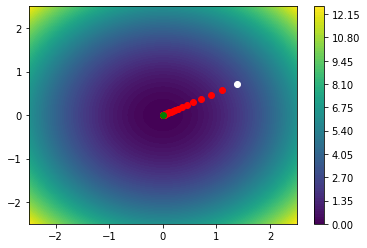

Solucion: [4.8771140983880554e-49, 2.491942162036724e-49] 2.99960176676318e-97


In [ ]:
import math                      
import matplotlib.pyplot as plt  
import numpy as np               
import random

#Definimos la funcion paraboloide

f  = lambda X:      X[0]**2+X[1]**2
df = lambda X: [2*X[0] , 2*X[1]]

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=.1 

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

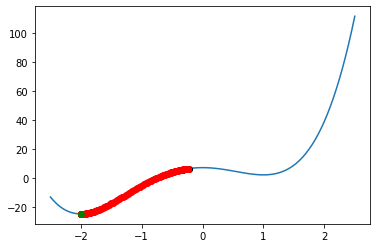

In [ ]:
# Nota: Esta es otra función a la que aplicaremos el algoritmo de descenso del gradiente
# a diferencia del ejercicio propuesto en clase, esta es una función en 2d

import numpy as np
import matplotlib.pyplot as plt
import decimal
import random
import math

f_gradiente = lambda x: (12*(x[0]**3)) + (12*(x[0]**2)) - (24*x[0])
f_x = lambda x: (3*(x[0]**4)) + (4*(x[0]**3)) - (12*(x[0]**2)) + 7

resolucion = 100
rango = 2.5
x = np.linspace(-rango, rango, resolucion)
y = np.zeros(resolucion)

for ix, i in enumerate(x):
    y[ix] = f_x([i])

plt.plot(x, y)

random_number = int(random.uniform(0, len(x)-1))
P = np.array([x[random_number], y[random_number]])
plt.plot(P[0], P[1], "o", c="black")

taza_aprendizaje = .001

for _ in range(500):
  x_anterior = P
  P[1] = f_x(x_anterior)
  P[0] -= np.dot(taza_aprendizaje, f_gradiente(x_anterior))
  plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
plt.show()